In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint as pp
import csv
import datetime
from dateutil.parser import parse
from pandas.tools.plotting import scatter_matrix
import statsmodels.formula.api as smf
%matplotlib inline


In [96]:
complete_df = pd.read_csv("complete.csv")
complete_df.describe()


,opening_weekend,foreign_gross,posts_score,comments_score
count,1.543000e+03,1.479000e+03,1543.000000,1543.000000
mean,1.442541e+07,6.940496e+07,3335.982502,19722.269605
std,2.272687e+07,1.361247e+08,5594.419504,39616.307357
min,9.200000e+01,1.460000e+02,0.000000,-1.000000
25%,1.356860e+05,2.203883e+06,64.000000,297.000000
50%,6.842220e+06,1.760000e+07,539.000000,2697.000000
75%,1.893775e+07,7.329502e+07,3941.500000,18385.500000
max,2.074387e+08,2.027457e+09,34121.000000,394250.000000


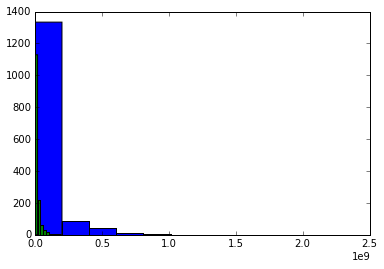

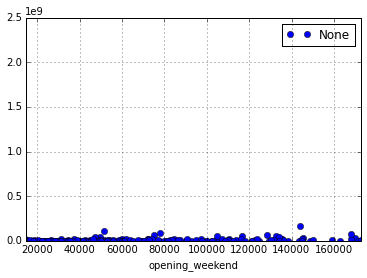

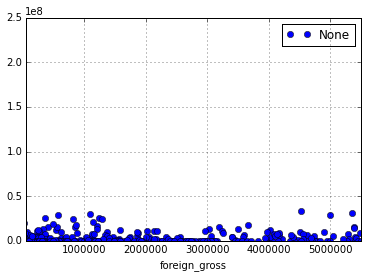

In [97]:
complete_df = complete_df[np.isfinite(complete_df['foreign_gross'])]
complete_df = complete_df[np.isfinite(complete_df['opening_weekend'])]
plt.hist(complete_df["foreign_gross"])
plt.hist(complete_df["opening_weekend"])

complete_df.plot(x="opening_weekend", y="foreign_gross", style='o')
complete_df.plot(x="foreign_gross", y="opening_weekend", style='o')

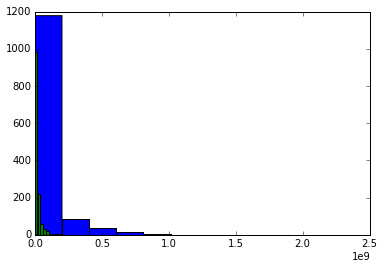

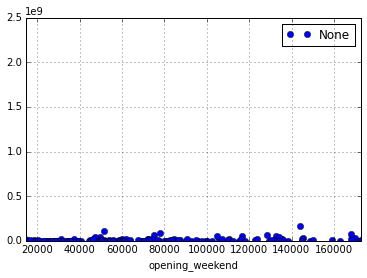

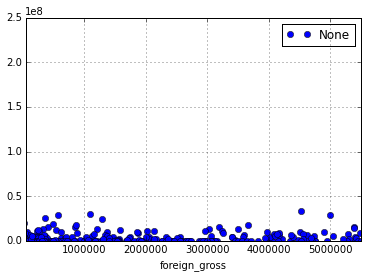

In [98]:
complete_df = complete_df[np.isfinite(complete_df['foreign_gross'])]
complete_df = complete_df[np.isfinite(complete_df['opening_weekend'])]
complete_df = complete_df[np.isfinite(complete_df['comments_score'])]
complete_df = complete_df[np.isfinite(complete_df['posts_score'])]

complete_df["opening_weekend"] = complete_df["opening_weekend"].apply(lambda x: int(x))
complete_df["foreign_gross"] = complete_df["foreign_gross"].apply(lambda x: int(x))
# complete_df["release_date"] = complete_df["release_date"].apply(lambda x: parse(x).date())

complete_df = complete_df[complete_df['comments_score']>0]
complete_df = complete_df[complete_df['posts_score']>0]

complete_df["reddit_buzz"]=complete_df['comments_score']+complete_df["posts_score"]
complete_df = complete_df[complete_df['reddit_buzz']>0]

plt.hist(complete_df["foreign_gross"])
plt.hist(complete_df["opening_weekend"])

complete_df.plot(x="opening_weekend", y="foreign_gross", style='o')
complete_df.plot(x="foreign_gross", y="opening_weekend", style='o')

,opening_weekend,foreign_gross,posts_score,comments_score,reddit_buzz,optimus_mine
count,1.321000e+03,1.321000e+03,1321.000000,1321.000000,1321.000000,1.321000e+03
mean,1.622696e+07,7.639882e+07,3781.728236,22379.294474,26161.022710,1.625312e+07
std,2.382976e+07,1.416361e+08,5831.615975,41666.185813,46620.025205,2.384245e+07
min,2.260000e+02,2.790000e+02,1.000000,1.000000,2.000000,4.370000e+02
25%,2.231190e+05,3.971971e+06,143.000000,718.000000,904.000000,2.575010e+05
50%,8.754168e+06,2.222315e+07,908.000000,4122.000000,5318.000000,8.781661e+06
75%,2.105817e+07,8.260000e+07,4826.000000,22323.000000,28320.000000,2.109999e+07
max,2.074387e+08,2.027457e+09,34121.000000,394250.000000,415019.000000,2.077120e+08


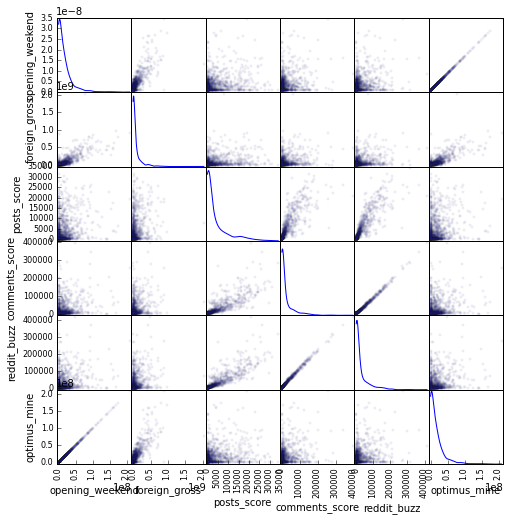

In [99]:
complete_df["optimus_mine"]=complete_df["reddit_buzz"]+complete_df["opening_weekend"]
scatter_matrix(complete_df, alpha=0.05, figsize=(8,8), diagonal='kde')
complete_df.describe()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120e67cd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117769f90>]], dtype=object)

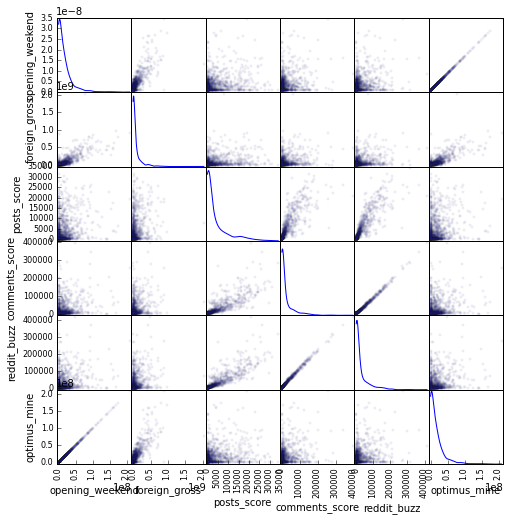

In [103]:
scatter_matrix(complete_df, alpha=0.05, figsize=(8,8), diagonal='kde')


In [105]:
model = smf.ols(formula="foreign_gross ~ opening_weekend", data=complete_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          foreign_gross   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     1957.
Date:                Wed, 22 Apr 2015   Prob (F-statistic):          8.13e-263
Time:                        17:34:56   Log-Likelihood:                -26067.
No. Observations:                1321   AIC:                         5.214e+04
Df Residuals:                    1319   BIC:                         5.215e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        1.857e+06   2.99e+06      0.620      0.535     -4.02e+06  7.73e+06
opening_weekend     4.5937      0.104     44.235      0.000         4.390     4.797
==============================================================================
Omnibus:                     1697.685   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           563974.173
Skew:                           6.504   Prob(JB):                         0.00
Kurtosis:                     103.385   Cond. No.                     3.49e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
model = smf.ols(formula="foreign_gross ~ opening_weekend + reddit_buzz", data=complete_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          foreign_gross   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     1000.
Date:                Wed, 22 Apr 2015   Prob (F-statistic):          5.37e-265
Time:                        17:34:58   Log-Likelihood:                -26058.
No. Observations:                1321   AIC:                         5.212e+04
Df Residuals:                    1318   BIC:                         5.214e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept       -2.245e+06   3.13e+06     -0.718      0.473     -8.38e+06  3.89e+06
opening_weekend     4.4697      0.107     41.695      0.000         4.259     4.680
reddit_buzz       233.7357     54.795      4.266      0.000       126.241   341.230
==============================================================================
Omnibus:                     1704.185   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           580096.808
Skew:                           6.542   Prob(JB):                         0.00
Kurtosis:                     104.823   Cond. No.                     3.67e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.67e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""